# Business Problem
As a marketing agency, our primary objective is to maximize the return on investment (ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions, and overall cost-effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.

# Research Question
#### Which ad platform is more effective in terms of conversions, clicks, and overall cost-effectiveness?

# Importing Libraries



In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint

import warnings
warnings.filterwarnings('ignore')


# Data Description

The dataset comprises a collection of data comparing the performance of two separate ad campaigns conducted throughout the year 2019. Specifically, the data covers a Facebook Ad campaign and an AdWords Ad campaign. 
For each day of the year 2019, there is a corresponding row in the dataset, resulting in a total of 365 lines of campaign data to analyze. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

Key features included in the dataset are as follows:
- Date: The date corresponding to each row of campaign data, ranging from January 1st, 2019, to December 31st, 2019.
- Ad Views: The number of times the ad was viewed.
- Ad Clicks: The number of clicks received on the ad.
- Ad Conversions: The number of conversions resulting from the ad.
- Cost per Ad: The cost associated with running the Facebook ad campaign.
- Click-Through Rate (CTR): The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
- Conversion Rate: The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
- Cost per Click (CPC): The average cost incurred per click on the ad.

#### Loading the Dataset

In [3]:
df = pd.read_csv('marketing_campaign.csv')

In [4]:
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [5]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 365 rows and 17 columns


In [6]:
df.dtypes

Date                                               object
Facebook Ad Campaign                               object
Facebook Ad Views                                   int64
Facebook Ad Clicks                                  int64
Facebook Ad Conversions                             int64
Cost per Facebook Ad                               object
Facebook Click-Through Rate (Clicks / View)        object
Facebook Conversion Rate (Conversions / Clicks)    object
Facebook Cost per Click (Ad Cost / Clicks)         object
AdWords Ad Campaign                                object
AdWords Ad Views                                    int64
AdWords Ad Clicks                                   int64
AdWords Ad Conversions                              int64
Cost per AdWords Ad                                object
AdWords Click-Through Rate (Clicks / View)         object
AdWords Conversion Rate (Conversions / Click)      object
AdWords Cost per Click (Ad Cost / Clicks)          object
dtype: object

##### Converting date to datetime

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

#### Descriptive Stats of the Campaign

In [10]:
df.describe()

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions
count,365,365.000000,365.000000,365.000000,365.00000,365.000000,365.000000
mean,2019-07-02 00:00:00,2179.687671,44.049315,11.742466,4717.19726,60.383562,5.980822
min,2019-01-01 00:00:00,1050.000000,15.000000,5.000000,3714.00000,31.000000,3.000000
25%,2019-04-02 00:00:00,1656.000000,35.000000,10.000000,4247.00000,49.000000,5.000000
50%,2019-07-02 00:00:00,2202.000000,43.000000,12.000000,4711.00000,60.000000,6.000000
75%,2019-10-01 00:00:00,2717.000000,54.000000,13.000000,5190.00000,73.000000,7.000000
max,2019-12-31 00:00:00,3320.000000,73.000000,19.000000,5760.00000,89.000000,9.000000
std,NaN,618.074639,12.140559,2.924786,561.11406,14.368225,1.628106


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* Date Range: Data covers Jan 1, 2019 → Dec 31, 2019 (365 days).
* **Facebook Ads** :-
    * Avg views : ~2179/day (min: 1050, max:3320)
    * Avg clicks : ~44/day , Avg conversion : ~12/day
    * Conversion rate : **27% of clicks** (conversion : 12/44)
* **AdWords Ads** :-
    * Avg views : ~4717/day (min: 3714, max:5760)
    * Avg clicks : ~60/day , Avg conversion : ~6/day
    * Conversion rate : **10% of clicks** (conversion : 6/60)
 
* **AdWords has highest reach (views and Clicks) but lesser conversion rate**
* **Facebook has fewer views/clicks compred to AdWords but has higher conversion rate**

### Campaigns Performance

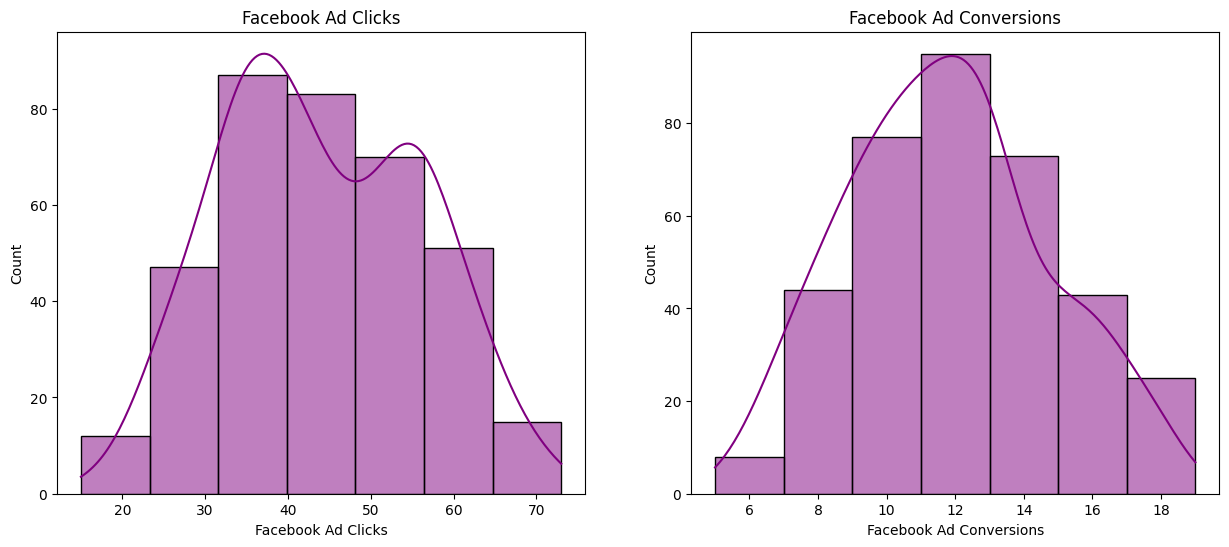

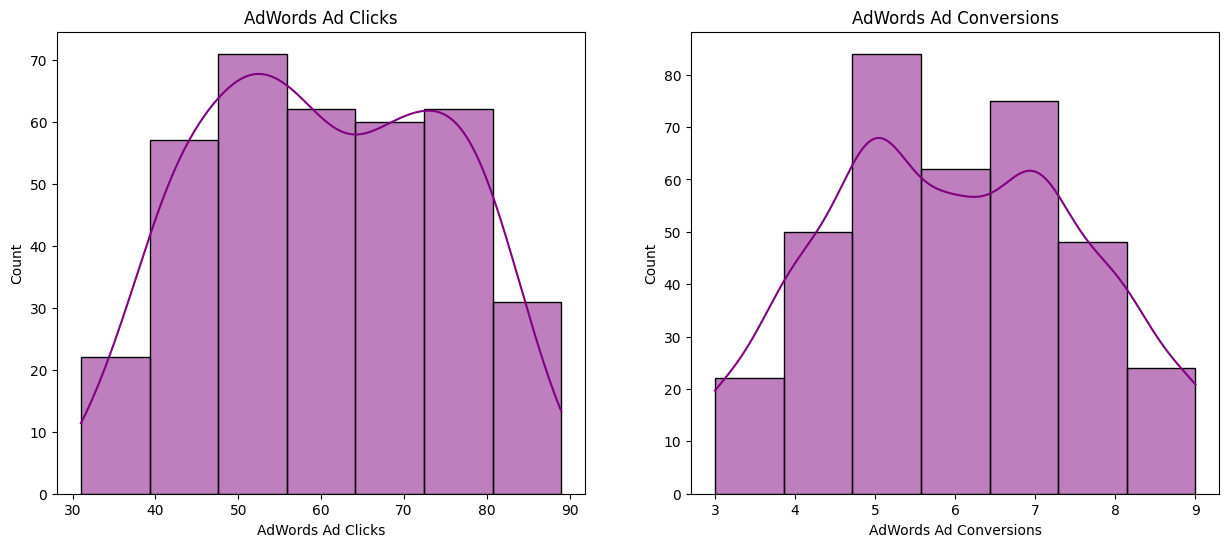

In [18]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook Ad Clicks")
sns.histplot(df['Facebook Ad Clicks'], bins = 7, edgecolor = 'k', kde = True, color = 'purple')
plt.subplot(1,2,2)
plt.title('Facebook Ad Conversions')
sns.histplot(df['Facebook Ad Conversions'], bins = 7, edgecolor = 'k', kde = True,color = 'purple')
plt.show()

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("AdWords Ad Clicks")
sns.histplot(df['AdWords Ad Clicks'], bins = 7, edgecolor = 'k', kde = True,color = 'purple')
plt.subplot(1,2,2)
plt.title('AdWords Ad Conversions')
sns.histplot(df['AdWords Ad Conversions'], bins = 7, edgecolor = 'k', kde = True,color = 'purple')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* From the histogram figures, we observe that both Facebook and AdWords Ad Clicks & Ad Conversions are **almost symmetrical in shape**, indicating that they are relatively evenly distributed. In simple terms, this suggests that there are **not many outliers** at either the higher or lower end.

#### Checking for the days having highest no of conversion rate and days having lowest conversion rate

In [21]:
def create_conversion_category(con_col):
    category = []
    for conversion in df[con_col]:
        if conversion < 6:
            category.append("less than 6")
        elif 6<= conversion <11:
            category.append('6-10')
        elif 11<= conversion < 16:
            category.append('10-15')
        else:
            category.append("more than 15")
    return category

## Applying function
df['Facebook conversion category'] = create_conversion_category('Facebook Ad Conversions')
df['AdWords conversion category'] = create_conversion_category('AdWords Ad Conversions')

In [23]:
df[['Facebook Ad Conversions',
    'Facebook conversion category',
    'AdWords Ad Conversions',
    'AdWords conversion category']].head()


,Facebook Ad Conversions,Facebook conversion category,AdWords Ad Conversions,AdWords conversion category
0,8,6-10,5,less than 6
1,12,10-15,6,6-10
2,8,6-10,4,less than 6
3,9,6-10,5,less than 6
4,7,6-10,7,6-10


In [24]:
df['Facebook conversion category'].value_counts()

Facebook conversion category
10-15           189
6-10            128
more than 15     47
less than 6       1
Name: count, dtype: int64

In [26]:
facebook = pd.DataFrame(df['Facebook conversion category'].value_counts()).reset_index().rename(columns= {'Facebook conversion category' : 'Category'})
                                                                                                

In [27]:
facebook

,Category,count
0,10-15,189
1,6-10,128
2,more than 15,47
3,less than 6,1


In [28]:
df['AdWords conversion category'].value_counts()

AdWords conversion category
6-10           209
less than 6    156
Name: count, dtype: int64

In [29]:
AdWords = pd.DataFrame(df['AdWords conversion category'].value_counts()).reset_index().rename(columns= {'AdWords conversion category' : 'Category'})


In [30]:
AdWords

,Category,count
0,6-10,209
1,less than 6,156


##### Merging both facebook & AdWords categories

In [32]:
category_df = pd.merge(facebook, AdWords, on = 'Category', how='outer').fillna(0)
category_df

,Category,count_x,count_y
0,10-15,189,0.0
1,6-10,128,209.0
2,more than 15,47,0.0
3,less than 6,1,156.0


In [37]:
category_df = category_df.rename(columns = {'count_x' : 'facebook count', 'count_y' : 'AdWords count'})

In [38]:
category_df

,Category,facebook count,AdWords count
0,10-15,189,0.0
1,6-10,128,209.0
2,more than 15,47,0.0
3,less than 6,1,156.0


In [39]:
### Rearranging rows

category_df = category_df.iloc[[3,1,0,2]]
category_df

,Category,facebook count,AdWords count
3,less than 6,1,156.0
1,6-10,128,209.0
0,10-15,189,0.0
2,more than 15,47,0.0


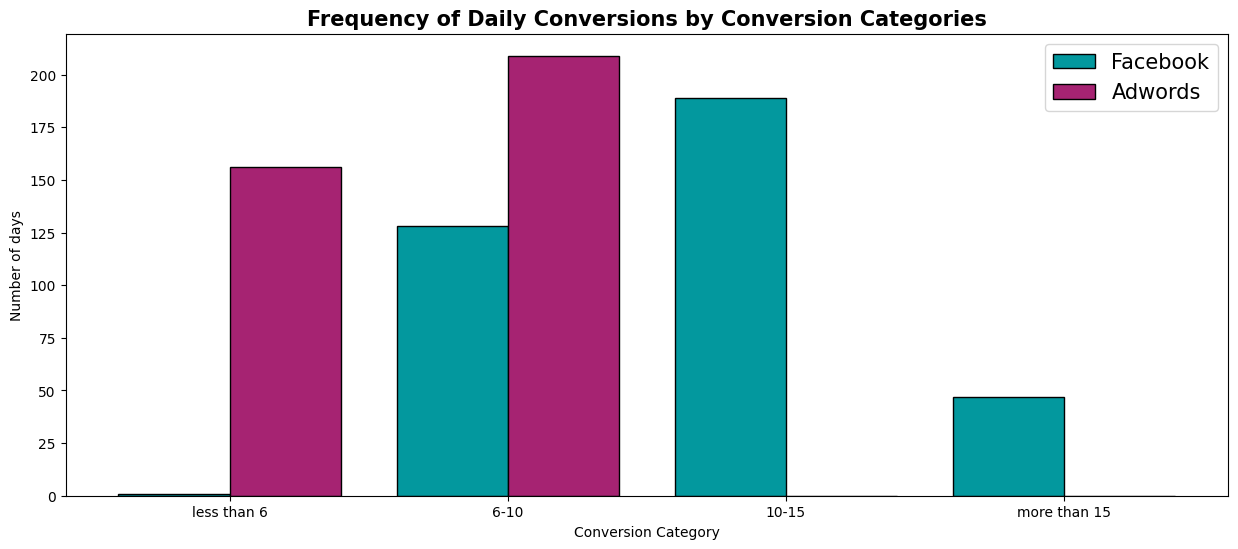

In [45]:
X_axis = np.arange(len(category_df))
plt.figure(figsize=(15,6))
plt.bar(X_axis - 0.2, category_df['facebook count'], 0.4, label = 'Facebook', color = '#03989E', linewidth = 1, edgecolor = 'k') 
plt.bar(X_axis + 0.2, category_df['AdWords count'], 0.4, label = 'Adwords', color = '#A62372', linewidth = 1, edgecolor = 'k') 
  
plt.xticks(X_axis, category_df['Category']) 
plt.xlabel("Conversion Category") 
plt.ylabel("Number of days") 
plt.title("Frequency of Daily Conversions by Conversion Categories", fontsize = 15, fontweight ='bold') 
plt.legend(fontsize = 15) 
plt.show() 

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* The data reveals that Facebook had more frequent higher conversion days than AdWords, which mostly recorded low (<6) or moderate (6–10) conversions. This highlights a significant performance gap and variability between the two campaigns.
* The lack of days with conversions above 10 in AdWords suggests a missing performance band. This indicates potential issues in targeting, bidding strategy or external factors and warrants further review to identify optimization opportunities.

#### Checking for Whether more clicks on the ad really lead to more sales

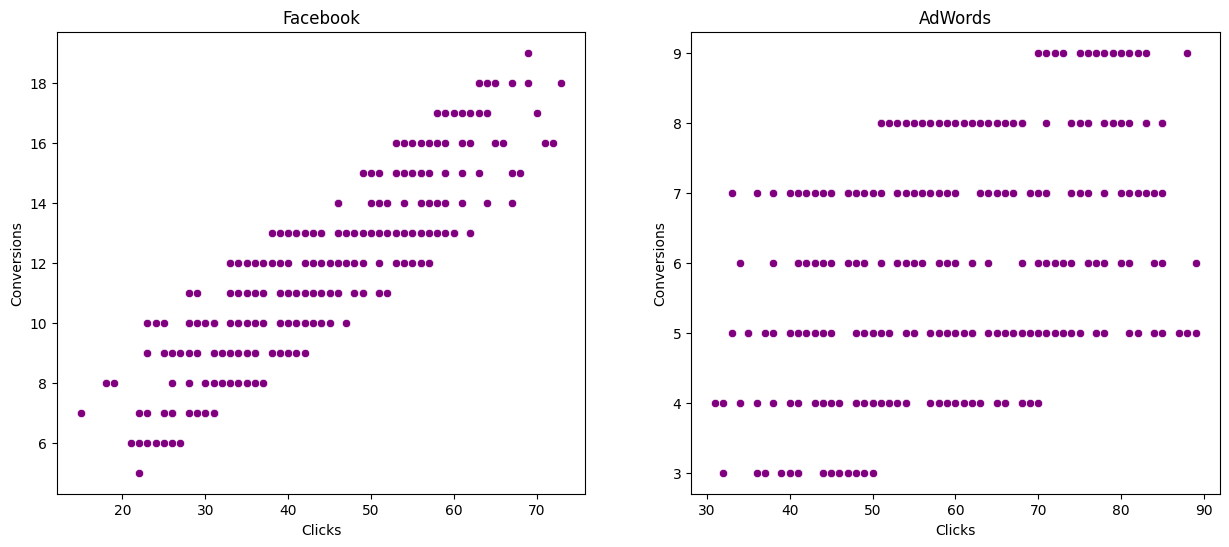

In [48]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.title("Facebook")
sns.scatterplot(x=df['Facebook Ad Clicks'], y=df['Facebook Ad Conversions'], color = 'purple')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.subplot(1,2,2)
plt.title('AdWords')
sns.scatterplot(x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'], color = 'purple')
plt.xlabel('Clicks')
plt.ylabel('Conversions')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* There is a strong correlation between Facebook Ads clicks and conversions, but we cannot see any correlation between AdWords clicks and conversions. Let's do further analysis to quantify it

In [49]:
facebook_corr = df[['Facebook Ad Clicks', 'Facebook Ad Conversions']].corr()
facebook_corr

,Facebook Ad Clicks,Facebook Ad Conversions
Facebook Ad Clicks,1.000000,0.873775
Facebook Ad Conversions,0.873775,1.000000


In [50]:
adwords_corr = df[['AdWords Ad Clicks', 'AdWords Ad Conversions']].corr()
adwords_corr

,AdWords Ad Clicks,AdWords Ad Conversions
AdWords Ad Clicks,1.000000,0.447993
AdWords Ad Conversions,0.447993,1.000000


In [55]:
print("----------------------\nCorrelation Coefficient\n----------------------")
print("Facebook :", round(facebook_corr.values[0,1],2))
print("AdWords :", round(adwords_corr.values[0,1],2))     

----------------------
Correlation Coefficient
----------------------
Facebook : 0.87
AdWords : 0.45


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* A correlation coefficient of **0.87** indicates a strong positive linear relationship between clicks on Facebook ads and sales. This suggests that as the number of clicks on Facebook ads increases, sales tend to increase as well.
* This strong correlation suggests that Facebook ads are highly effective in driving sales, as a large portion of the variation in sales can be explained by the variation in clicks on Facebook ads.
* The strong correlation between clicks on Facebook ads and sales suggests that Facebook advertising is highly effective in driving sales for the business. Increasing investment in Facebook ads or optimizing their performance could potentially lead to even higher sales.
* A correlation coefficient of **0.45** indicates a moderate positive linear relationship between clicks on AdWords ads and sales. While there is still a positive relationship, it is not as strong as with Facebook ads.
* The moderate correlation between clicks on AdWords ads and sales indicates that while AdWords advertising does contribute to sales, its effectiveness may be influenced by other factors. Further analysis is needed to identify these factors and optimize AdWords campaigns accordingly.

## Hypothesis Testing

**Hypothesis:**  Advertising on Facebook will result in a greater number of conversions than adverstining on AdWords

**Null Hypothesis(HO):** There is no difference in the number of conversions between Facebook & AdWords or the number of conversions from AdWords is greater than or equal to those from Facebook.

H0: µ_Facebook ≤ µ_AdWords

**Alternate Hypothesis(H1):** The number of conversions from Facebook is greater than the number of rof conversions from AdWords

H1: µ_Facebook > µ_AdWords

In [58]:
print("Mean Conversion \n---------------")
print("Facebook:", round(df['Facebook Ad Conversions'].mean(),2))
print("AdWords:", round(df['AdWords Ad Conversions'].mean(),2))

t_stats, p_value = st.ttest_ind(a = df['Facebook Ad Conversions'], b= df['AdWords Ad Conversions'], equal_var = False)
print('\nT Statistic:', t_stats, '\nP-Value:', p_value)

if p_value < 0.05:
    print("\nP-value is less than significance value, Reject the Null Hypothesis")
else:
    print("\nP-value is greater than significance value, Accept the Null Hypothesis")
    
                          

Mean Conversion 
---------------
Facebook: 11.74
AdWords: 5.98

T Statistic: 32.88402060758184 
P-Value: 9.348918164530465e-134

P-value is less than significance value, Reject the Null Hypothesis


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights from A/B Test (Facebook vs AdWords Ads):</font></h3>

* **Facebook Ads: 11.74 conversions, AdWords Ads: 5.98 conversions.**
    * 👉 On average, Facebook generates almost double the conversions compared to AdWords
* The T statistic is a measure of the differene between the means of the two groups relative to the variation within the groups. A larger T statistic indicates a greater difference between the means of the two groups.
* The **p-value (9.35e-134)** is extremely small, indicating **strong evidence against the null hypothesis.**
* The results strongly support the alternate hypothesis, indicating that the number of conversions from Facebook advertising is indeed greater than the number of conversions from AdWords advertising.
* Facebook advertising appears to be a more effective channel for generating conversions compared to AdWords advertising, based on the sample data analyzed.
* Given the significant difference in conversion rates between Facebook and AdWords:
    * Reallocate more budget and resources towards Facebook Ads (increase ad spend, expand targeting, test new formats).
    * Continue monitoring AdWords performance for possible niche segments, but prioritize Facebook where ROI is clearly stronger.

# Regression Analysis



#### Estimating Conversions from Click Data When Choosing Facebook Ads

In [59]:
## Independent Variable
X = df[['Facebook Ad Clicks']]

## Dependent Variable
y= df[['Facebook Ad Conversions']]

## intializing the model
LR = LinearRegression()
LR.fit(X,y)
pred = LR.predict(X)

## Model Evaluation
r2 = r2_score(y, pred)*100
mse = mean_squared_error(y, pred)
print("Accuracy (R2 Score):", round(r2,2),"%")
print("Mean Squared Error:", round(mse,2),"%")


Accuracy (R2 Score): 76.35 %
Mean Squared Error: 2.02 %


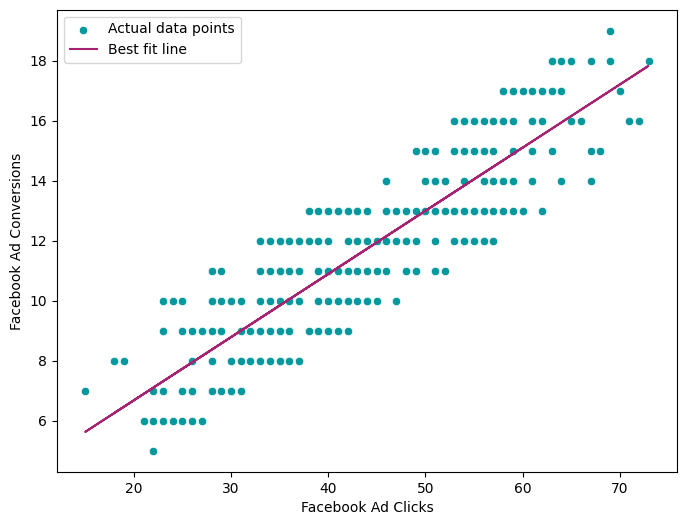

In [61]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'], color = '#03989E', label = 'Actual data points')
plt.plot(df['Facebook Ad Clicks'], pred, color = '#A62372', label = 'Best fit line')
plt.legend()
plt.show()

In [64]:
print(f'For {50} Clicks, Expected Conversion : {round(LR.predict([[50]])[0][0],2)}')
print(f'For {80} Clicks, Expected Conversion : {round(LR.predict([[80]])[0][0],2)}')
print(f'For {100} Clicks, Expected Conversion : {round(LR.predict([[100]])[0][0],2)}')


For 50 Clicks, Expected Conversion : 13.0
For 80 Clicks, Expected Conversion : 19.31
For 100 Clicks, Expected Conversion : 23.52


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* The model has a reasonably good predictive power, with an R2 score of 76.35%. This suggests that it can effectively predict Facebook ad conversions based on the number of Facebook ad clicks.
* With the insights provided by the Linear Regression model, businesses can make informed decisions about resource allocation, budget planning, and campaign optimization.
* For instance, knowing the expected number of Facebook ad conversions based on a certain number of Facebook ad clicks can help in setting realistic campaign goals, optimizing ad spend and assessing the ROI of Facebook advertising efforts.

## Analyzing Facebook Campaign metrics over time

In [66]:
## Cleaning data (removing unwanted symbols from the columns and converting them to numerical columns)
df['Facebook Click-Through Rate (Clicks / View)'] = df['Facebook Click-Through Rate (Clicks / View)'].apply(lambda x: float(x[:-1]))
df['Facebook Conversion Rate (Conversions / Clicks)'] = df['Facebook Conversion Rate (Conversions / Clicks)'].apply(lambda x: float(x[:-1]))
df['Facebook Cost per Click (Ad Cost / Clicks)'] = df['Facebook Cost per Click (Ad Cost / Clicks)'].apply(lambda x: float(x[1:]))
df['Cost per Facebook Ad'] = df['Cost per Facebook Ad'].apply(lambda x: float(x[1:]))

In [75]:
### Filtering the data for facebook Campaign

fb_df = df[['Date','Facebook Ad Campaign','Facebook Ad Views','Facebook Ad Clicks','Facebook Ad Conversions',
                  'Cost per Facebook Ad', 'Facebook Click-Through Rate (Clicks / View)',
                  'Facebook Conversion Rate (Conversions / Clicks)',
                  'Facebook Cost per Click (Ad Cost / Clicks)']]

fb_df.head()
                  

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,FB_Jan19,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,FB_Jan19,3106,36,12,104.0,1.15,34.04,2.91
2,2019-01-03,FB_Jan19,3105,26,8,102.0,0.84,31.45,3.89
3,2019-01-04,FB_Jan19,1107,27,9,71.0,2.45,34.76,2.62
4,2019-01-05,FB_Jan19,1317,15,7,78.0,1.10,47.59,5.38


## Conversion Trends by Day and Time (When Do Conversions Peak?)

In [76]:
fb_df['month'] = fb_df['Date'].dt.month
fb_df['week'] = fb_df['Date'].dt.weekday

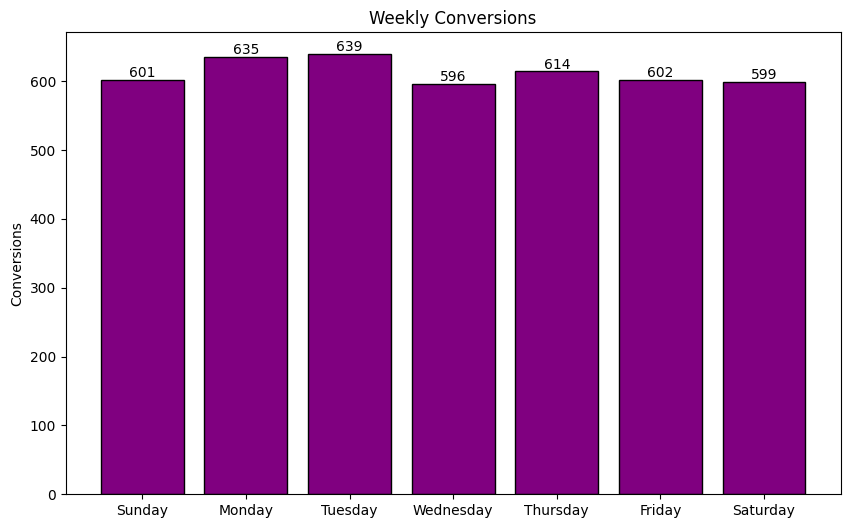

In [87]:
plt.figure(figsize=(10,6))
plt.title("Weekly Conversions")

# Group by week and sum conversions
weekly_conversion = fb_df.groupby('week')[['Facebook Ad Conversions']].sum()

# Week names
week_names = ['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']


bars = plt.bar(week_names, weekly_conversion['Facebook Ad Conversions'], 
               color='purple', edgecolor='k')


for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height,   
             f'{height}',                              
             ha='center', va='bottom', fontsize=10)

plt.ylabel("Conversions")
plt.show()

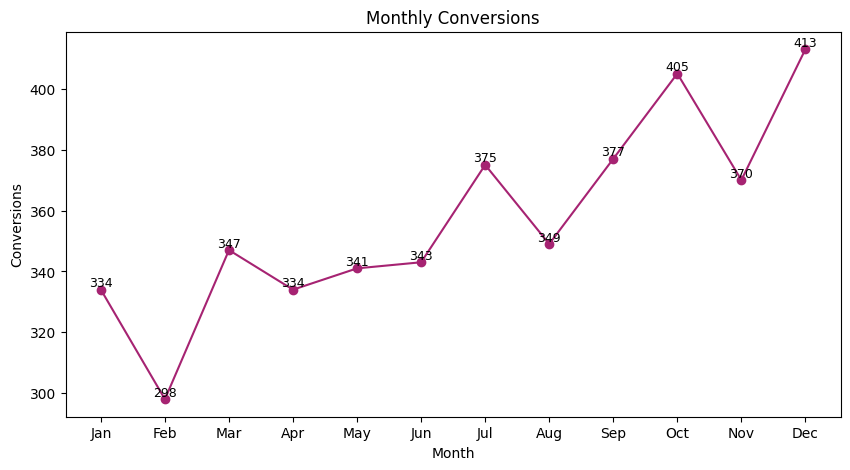

In [86]:
plt.figure(figsize=(10,5))
plt.title('Monthly Conversions')

# Group by month
monthly_conversion = fb_df.groupby('month')[['Facebook Ad Conversions']].sum()
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

# Plot line with markers
plt.plot(month_names, monthly_conversion['Facebook Ad Conversions'], '-o', color='#A62372')

# Add labels on each point
for i, value in enumerate(monthly_conversion['Facebook Ad Conversions']):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=9)

plt.ylabel("Conversions")
plt.xlabel("Month")
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* Across the weekdays over a year, the total number of conversions remains relatively consistent, indicating a consistent level of engagement throughout the week. However, Mondays and Tuesdays consistently exhibit the highest conversion rates compared to other days, suggesting that the beginning of the workweek sees heightened user engagement or responsiveness to marketing efforts.
* Examining the monthly trend in conversions reveals an overall upward trajectory, indicating a general increase in conversions over time. However, certain months stand out with variations in conversion rates. February, April, May, June, August, and November experience a decline in conversions compared to neighboring months. These periods of decreased conversion rates could be influenced by factors such as seasonal fluctuations, changes in consumer behavior, or adjustments in marketing strategies

#### How does the Cost Per Conversion (CPC) trend over time?

* **Cost Per Conversion (CPC):** This metric is used to evaluate the cost effectiveness and profitability of an online advertising campaign. This metric helps marketers understand how much they are spending to obtain each conversion, allowing them to optimize their spending and targeting strategies effectively.

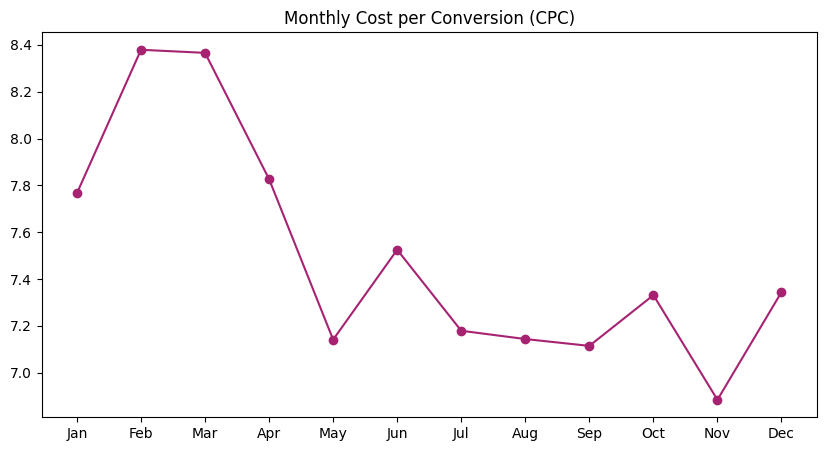

In [93]:
plt.figure(figsize=(10,5))
plt.title("Monthly Cost per Conversion (CPC)")
monthly_df = fb_df.groupby('month')[['Facebook Ad Conversions', 'Cost per Facebook Ad']].sum()
monthly_df['Cost per Conversion'] = monthly_df['Cost per Facebook Ad']/monthly_df['Facebook Ad Conversions']
plt.plot(month_names, monthly_df['Cost per Conversion'],'-o', color = '#A62372')
plt.show()

<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* The CPC trend over the 12-month period shows some fluctuations but overall maintains a relatively stable range
* **May and November** recorded the **lowest CPC values**, indicating potentially more cost-effective advertising or higher conversion rates during these periods.
* **February** has the **highest CPC value**, suggesting that advertising costs may be relatively higher during this month compared to others.
* Lower CPC values in certain months (e.g., May and November) could signal periods of higher advertising effectiveness or more favorable market conditions.
* **Recommendation:** Consider allocating more advertising budget during months with historically lower CPC values (e.g., May and November) to maximize ROI.

### Is there a long-term equilibrium relationship between advertising spend and conversion rates that suggests a stable, proportional impact of budget changes on conversions over time?


In [100]:
score, p_value, _ = coint(fb_df['Cost per Facebook Ad'],fb_df['Facebook Ad Conversions'])
print('Cointegration test score:', score)
print('P-value:', p_value)
print('Critical Values:', _)

if p_value < 0.05:
    print("\np-value is less than significance value, Reject the null hypothesis")
else:
    print("\np-value is greater than significance value, Accept the null hypothesis")

Cointegration test score: -14.755428385103226
P-value: 2.1337375979060563e-26
Critical Values: [-3.92678068 -3.35296748 -3.05612218]

p-value is less than significance value, Reject the null hypothesis


<div style="border-radius:10px; border:#808080 solid; padding: 15px; background-color: ##F0E68C ; font-size:100%; text-align:left">

<h3 align="left"><font color=brown>📊 Insights:</font></h3>

* Since the p-value is significantly lower than the chosen significance level, we reject the null hypothesis. This indicates that there is a long-term equilibrium relationship between advertising spend (cost) and conversions.
* Businesses can use this understanding of the stable relationship between cost and conversions to optimize their advertising strategies. By investing in campaigns that demonstrate a strong return on investment (ROI) and adjusting spending based on performance, companies can maximize conversions while minimizing costs..